# Neural & Behavioral Modeling - Week 1 (Exercises)

In [2]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from IPython.display import *

## 1 Party Simulation (5 points)
This is a model of a cocktail party. The men and women at the party form groups. A party-goer becomes uncomfortable and switches groups if their current group has too many members of the opposite sex.

### 1.1 Insert your codes to complete the simulation (2 points)

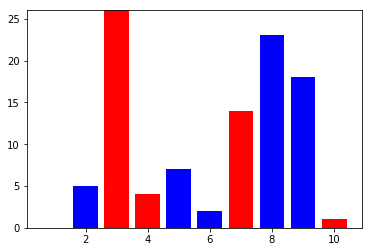

In [3]:
# Model parameters:
Ngroups=10
Npeople=100  
Tolerance=.25
# tolerable propotion of the opposite sex

# Supporting functions:
class Person:
    def __init__(self, Ngroups):
        self.sex = random.randint(2) # 0=woman; 1=man
        self.Ngroups=Ngroups
        self.group = random.randint(Ngroups) # staying in which group?
        
    def leave(self):
        options=delete(arange(self.Ngroups),self.group) # except the current group
        self.group = int(random.choice(options,1)) # choosing a new group
    
def party_stats(people): # calculate the number of men & women in each group
    Npeople=len(people)    
    sexes=[people[i].sex for i in range(Npeople)]
    groups=[people[i].group for i in range(Npeople)]
    counts=zeros((max(groups)+1,max(sexes)+1))
    proportions=counts.copy()
    for p in range(Npeople):
        counts[groups[p],sexes[p]]+=1
    men_plus_women=sum(counts,1) # number of men and women in each group
    men_plus_women[men_plus_women==0]=inf # to avoid "dividing by zeros later
    proportions[:,0]=counts[:,0]/men_plus_women # proportion of women in each group
    proportions[:,1]=counts[:,1]/men_plus_women # proportion of men in each group
    return counts, proportions # size=group*sex

def plot_party(counts):
    x=arange(len(counts))+1 # number of groups
    clf() # clear previous figure
    bar(x, counts[:,0], color = 'r') # women
    bar(x, counts[:,1], color = 'b', bottom = counts[:,0]) # men on top of women in the plot
    display(gcf()); clear_output(wait=True) # to allow dynamic plots
    
# Initialization:
people = [Person(Ngroups) for i in range(Npeople)] # assign each person to a group
Nhappy=0 # Number of happy people

# Simulation:
while(Nhappy<Npeople): # Simulation stops when everyone is happy
    Nhappy=0 # recounting after a new move

    
###########################################     
    # Insert your codes here to make everyone happy:
    who_is_not_happy=[]
    for i in range(Npeople):
        counts, proportions=party_stats(people) # summarize current condition
        if proportions[people[i].group, people[i].sex] < 1 - Tolerance: 
            who_is_not_happy.append(i)
        else:
            Nhappy += 1 # it same sex people enough, he/she is happy 
            
    for j in who_is_not_happy:
        people[j].leave()
###########################################  

    # Plot new results:
    counts, proportions=party_stats(people) # size=group*sex
    plot_party(counts)

#Show the convergening sequence
#print(record)

### 1.2 Modify the three model parameters & discuss how each affects your simulations (2 points)

### 1.2.1 Wrap up simulations into functions of model parameters

   #### At least two implementations exist,

   (1) PS1: After all the happiness judgements end, the unhappy people leave at once. 

   (2) PS2: Happiness is judged one by one. Once a person is judged as unhappy, he/she will leave at once. 

#####  1.2.1.1 PS1 Implememetaiton:

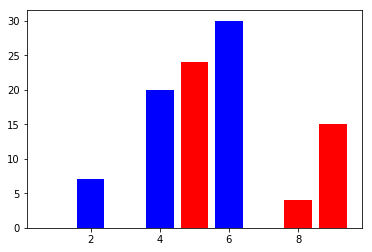

In [3]:
def PS1(Ngroups, Npeople, Tolerance):
    global counts, proportions, record, leave_times
    # Initialization:
    people = [Person(Ngroups) for i in range(Npeople)] # assign each person to a group
    Nhappy=0 # Number of happy people
    record=[] # Record the convergening sequence
    leave_times=0

    # Simulation:
    while(Nhappy<Npeople): # Simulation stops when everyone is happy
        Nhappy=0 # recounting after a new move
        
#### only part different between PS1 and PS2 #######################################         
        # Insert your codes here to make everyone happy:
        who_is_not_happy=[]
        for i in range(Npeople):
            counts, proportions=party_stats(people) # summarize current condition
            if proportions[people[i].group, people[i].sex] < 1 - Tolerance: 
                who_is_not_happy.append(i)
            else:
                Nhappy += 1 # it same sex people enough, he/she is happy 
            
        for j in who_is_not_happy:
            people[j].leave()
            leave_times+=1
#### only part different between PS1 and PS2 #######################################             
    
        # Plot new results:
        record.append(Nhappy)
        counts, proportions=party_stats(people) # size=group*sex
        plot_party(counts)
    
    return counts, proportions, record, leave_times

# try run
result = PS1(10,100,0.25)
#plot_party(counts)
#print(leave_times)
    

#####  1.2.1.2 PS2 Implememetaiton:

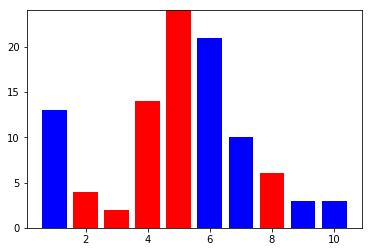

In [4]:
def PS2(Ngroups, Npeople, Tolerance):
    global counts, proportions, record, leave_times
    # Initialization:
    people = [Person(Ngroups) for i in range(Npeople)] # assign each person to a group
    Nhappy=0 # Number of happy people
    record=[] # Record the convergening sequence
    leave_times=0

    # Simulation:
    while(Nhappy<Npeople): # Simulation stops when everyone is happy
        Nhappy=0 # recounting after a new move
        
#### only part different between PS1 and PS2 #######################################        
        # Insert your codes here to make everyone happy:
        for i in range(Npeople):
            counts, proportions=party_stats(people) # summarize current condition
            if proportions[people[i].group, people[i].sex] < 1 - Tolerance: 
                people[i].leave() # it same sex people not enough, he/she leaves
                leave_times+=1
            else:
                Nhappy += 1 # it same sex people enough, he/she is happy 
#### only part different between PS1 and PS2 #######################################                   
        
        # Plot new results:
        record.append(Nhappy)
        counts, proportions=party_stats(people) # size=group*sex
        plot_party(counts)
    
    return counts, proportions, record, leave_times

# try run
result = PS2(10,100,0.25)
#plot_party(counts)
#print(leave_times)

### 1.2.2 Quantify the properties of a simulation

#### Define and implement the properties of a simulation 

##### 1.2.2.1 Group properties

(a) group polarization: in all groups with people, the proportion of groups with only one sex

(b) table occupance: numbers of group with people/number of groups in the setup

(c) group variance: groups are all different or all the same

##### 1.2.2.2 Individual properties

(d) guest_effort: how many leaves a person needs on average to reach covergence

(e) host_effort: how many leaves a simulation needs to reach covergence 












In [5]:
def group_polarization(counts):
    all_groups = 0
    polar_groups = 0
    for i in range(len(counts)):
        if (counts[i,0] + counts[i,1]) > 0:
            all_groups +=1
            if counts[i,0] * counts[i,1] == 0:
                polar_groups +=1 
                   
                   
    g_polar = polar_groups/all_groups
    return g_polar


def table_occupance(counts):   
    all_groups = 0
    for i in range(len(counts)):
        if (counts[i,0] + counts[i,1]) > 0:
            all_groups +=1
                   
                   
    t_occ = all_groups/len(counts)
    return t_occ
    
    
def group_std(counts):
    each_group_size = []
    for i in range(len(counts)):
        if (counts[i,0] + counts[i,1]) > 0:
            each_group_size.append(counts[i,0] + counts[i,1])    
    g_std = std(each_group_size)
    return g_std

def guest_effort(counts, leave_times): 
    gu_effort = leave_times/sum(counts)
    return gu_effort

def host_effort(leave_times): 
    return leave_times



**Answer for 1.2, see the detailed analysis from 1.2.2~1.2.3**

model parameter dependence

(1) Group polarization: higher with lower tolerance, tolerance < 0.5 $\rightarrow$  must be group polarized.

*  Intersting Phenemenon
 * tolerance = 0.5 $\rightarrow$  more people, fewer tables ( small effect )
 * tolerance > 0.5 $\rightarrow$  fewer people, more tables

(2) Group variance (measured by std): higher with lower tolerance, fewer tables, more people

(3) Table occupance: higher with more people and fewer tables

* PS1: table occupance higher when tolerance higher
* PS2: table occupance lower when tolerance higher

(4)(5) Guest/Host effort (leave times by each person and as a whole): higher with low tolerance, fewer tables, more people when low tolerance, PS2 seems to have low effort than PS1




### 1.2.2 Systematic sampling: 
$\rightarrow$ run all the possilbe combinations of parameters
$\rightarrow$ each combination run 10 times and take means


### 1.2.2.1 Systematic sampling for PS1

Time lasting ~ 1000 seconds or 17 mins










50 250 0.9 Done
Time taken:  1000.0869784355164 seconds.


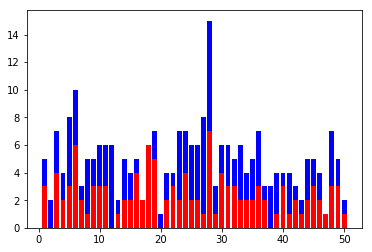

In [7]:
Ngroups_list=  [10, 25, 50]
Npeople_list=  [100, 150, 200, 250]
Tolerance_list=[0.25, 0.5, 0.75, 0.9]
simulation_times = 10


# record the current parameters
Ngroups_state=  []
Npeople_state=  []
Tolerance_state=[]
# record the performance
performace = {'group_polarization':[], 'table_occupance':[],'group_std':[],'guest_effort':[],'host_effort':[]}

import time
start = time.time()

for i in Ngroups_list:
    for j in Npeople_list:
        for k in Tolerance_list:
            Ngroups_state.append(i)
            Npeople_state.append(j)
            Tolerance_state.append(k)
            data_counts = []
            data_leave_times = []
            for q in range(0,simulation_times):
                counts, proportions, record, leave_times = PS1(i,j,k)
                data_counts.append(counts)
                data_leave_times.append(leave_times)
                
            performace['group_polarization'].append(mean([ group_polarization(p) for p in data_counts]))
            performace['table_occupance'].append(mean([ table_occupance(p) for p in data_counts]))
            performace['group_std'].append(mean([ group_std(p) for p in data_counts]))
            performace['guest_effort'].append(mean([ host_effort(p)/j for p in data_leave_times]))
            performace['host_effort'].append(mean([ host_effort(p) for p in data_leave_times]))
                
            print(str(i)+' '+str(j)+' '+str(k)+' '+'Done')
                
            

performace['Ngroups_state'] = Ngroups_state
performace['Npeople_state'] = Npeople_state
performace['Tolerance_state'] = Tolerance_state

end = time.time()
elapsed = end - start
print ("Time taken: ", elapsed, "seconds.")
performance_PS1 = performace

### 1.2.2 Systematic sampling for PS2

Time lasting ~ 833 seconds or 14 mins


50 250 0.9 Done
Time taken:  833.3865351676941 seconds.


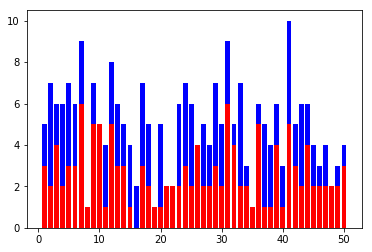

In [8]:
Ngroups_list=  [10, 25, 50]
Npeople_list=  [100, 150, 200, 250]
Tolerance_list=[0.25, 0.5, 0.75, 0.9]
simulation_times = 10


# record the current parameters
Ngroups_state=  []
Npeople_state=  []
Tolerance_state=[]
# record the performance
performace = {'group_polarization':[], 'table_occupance':[],'group_std':[],'guest_effort':[],'host_effort':[]}

import time
start = time.time()

for i in Ngroups_list:
    for j in Npeople_list:
        for k in Tolerance_list:
            Ngroups_state.append(i)
            Npeople_state.append(j)
            Tolerance_state.append(k)
            data_counts = []
            data_leave_times = []
            for q in range(0,simulation_times):
                counts, proportions, record, leave_times = PS2(i,j,k)
                data_counts.append(counts)
                data_leave_times.append(leave_times)
                
            performace['group_polarization'].append(mean([ group_polarization(p) for p in data_counts]))
            performace['table_occupance'].append(mean([ table_occupance(p) for p in data_counts]))
            performace['group_std'].append(mean([ group_std(p) for p in data_counts]))
            performace['guest_effort'].append(mean([ host_effort(p)/j for p in data_leave_times]))
            performace['host_effort'].append(mean([ host_effort(p) for p in data_leave_times]))
                
            print(str(i)+' '+str(j)+' '+str(k)+' '+'Done')
                
            

performace['Ngroups_state'] = Ngroups_state
performace['Npeople_state'] = Npeople_state
performace['Tolerance_state'] = Tolerance_state

end = time.time()
elapsed = end - start
print ("Time taken: ", elapsed, "seconds.")
performance_PS2 = performace

### 1.2.3 Data Visualization

### Note: all the figure use Npeople as X axis, Ngroup and Tolerance as Y axis
### Tolerance is the larger Y axis, from the bottom to the top is from low (0.25) to high (0.9)

#### 1.2.3.1 Group polarisation_PS1

Text(0.5,1,'group_polarization')

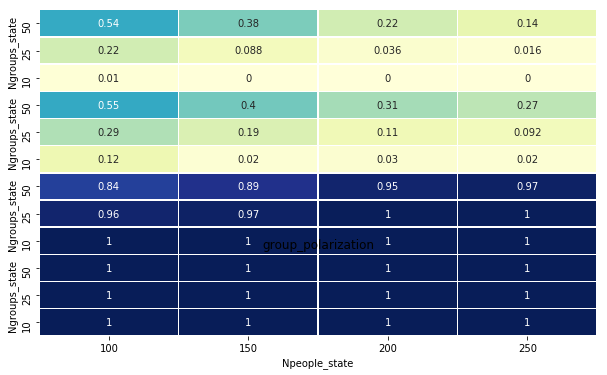

In [49]:
import pylab
import seaborn as sns
import pandas as pd
PS1_summary = pd.DataFrame.from_dict(performance_PS1)
pylab.rcParams['figure.figsize'] = (10, 6)

q = 4
for i in range(0,q):
        if i==0:
            first = subplot(q,1,i+1)
            pivotted= PS1_summary[PS1_summary['Tolerance_state']== Tolerance_list[q-1-i]].pivot('Ngroups_state','Npeople_state','group_polarization')
            ax = sns.heatmap(pivotted,cmap='YlGnBu', annot=True, linewidths=.5, vmin=0.0, vmax =1, cbar=False)
            ax.invert_yaxis()
            #plt.setp(first.get_xticklabels(), visible=False)
            setp(first.get_yticklabels(), visible=True)
        else:
            then = subplot(q,1,i+1,sharex = first)
            pivotted= PS1_summary[PS1_summary['Tolerance_state']== Tolerance_list[q-1-i]].pivot('Ngroups_state','Npeople_state','group_polarization')
            ax=sns.heatmap(pivotted,cmap='YlGnBu', annot=True, linewidths=.5, vmin=0.0, vmax =1, cbar=False)
            ax.invert_yaxis()
            #plt.setp(then.get_xticklabels(), visible=False)
            setp(then.get_yticklabels(), visible=True)

subplots_adjust(wspace=0, hspace=0)
pylab.title('group_polarization')

#plt.show()

#### 1.2.3.2 Group polarisation_PS2

Text(0.5,1,'group_polarization')

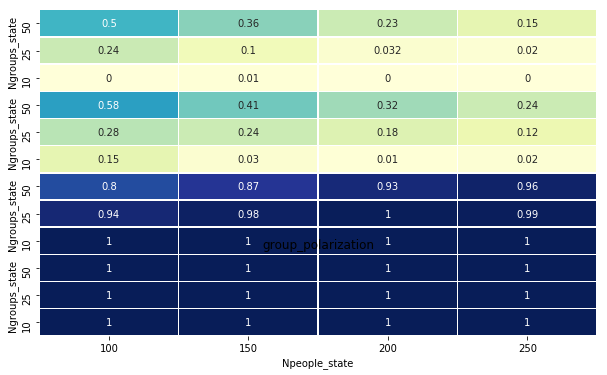

In [50]:
PS2_summary = pd.DataFrame.from_dict(performance_PS2)
pylab.rcParams['figure.figsize'] = (10, 6)

q = 4
for i in range(0,q):
        if i==0:
            first = subplot(q,1,i+1)
            pivotted= PS2_summary[PS2_summary['Tolerance_state']== Tolerance_list[q-1-i]].pivot('Ngroups_state','Npeople_state','group_polarization')
            ax = sns.heatmap(pivotted,cmap='YlGnBu', annot=True, linewidths=.5, vmin=0.0, vmax =1, cbar=False)
            ax.invert_yaxis()
            #plt.setp(first.get_xticklabels(), visible=False)
            setp(first.get_yticklabels(), visible=True)
        else:
            then = subplot(q,1,i+1,sharex = first)
            pivotted= PS2_summary[PS2_summary['Tolerance_state']== Tolerance_list[q-1-i]].pivot('Ngroups_state','Npeople_state','group_polarization')
            ax=sns.heatmap(pivotted,cmap='YlGnBu', annot=True, linewidths=.5, vmin=0.0, vmax =1, cbar=False)
            ax.invert_yaxis()
            #plt.setp(then.get_xticklabels(), visible=False)
            setp(then.get_yticklabels(), visible=True)

subplots_adjust(wspace=0, hspace=0)
pylab.title('group_polarization')


#plt.show()

#### 1.2.3.3 Group std_PS1

Text(0.5,1,'group_std')

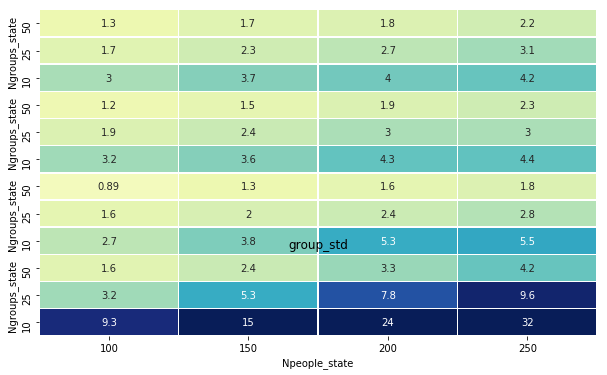

In [51]:
pylab.rcParams['figure.figsize'] = (10, 6)

q = 4
for i in range(0,q):
        if i==0:
            first = subplot(q,1,i+1)
            pivotted= PS1_summary[PS1_summary['Tolerance_state']== Tolerance_list[q-1-i]].pivot('Ngroups_state','Npeople_state','group_std')
            ax = sns.heatmap(pivotted,cmap='YlGnBu', annot=True, linewidths=.5, vmin=0, vmax =10, cbar=False)
            ax.invert_yaxis()
            #plt.setp(first.get_xticklabels(), visible=False)
            setp(first.get_yticklabels(), visible=True)
        else:
            then = subplot(q,1,i+1,sharex = first)
            pivotted= PS1_summary[PS1_summary['Tolerance_state']== Tolerance_list[q-1-i]].pivot('Ngroups_state','Npeople_state','group_std')
            ax=sns.heatmap(pivotted,cmap='YlGnBu', annot=True, linewidths=.5, vmin=0, vmax =10, cbar=False)
            ax.invert_yaxis()
            #plt.setp(then.get_xticklabels(), visible=False)
            setp(then.get_yticklabels(), visible=True)

subplots_adjust(wspace=0, hspace=0)
pylab.title('group_std')


#plt.show()

#### 1.2.3.4 Group std_PS2

Text(0.5,1,'group_std')

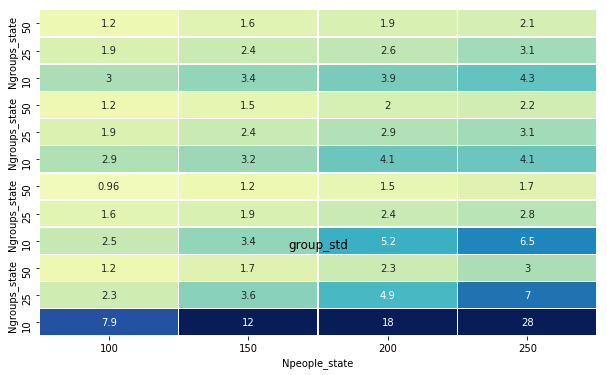

In [52]:
pylab.rcParams['figure.figsize'] = (10, 6)

q = 4
for i in range(0,q):
        if i==0:
            first = subplot(q,1,i+1)
            pivotted= PS2_summary[PS2_summary['Tolerance_state']== Tolerance_list[q-1-i]].pivot('Ngroups_state','Npeople_state','group_std')
            ax = sns.heatmap(pivotted,cmap='YlGnBu', annot=True, linewidths=.5, vmin=0, vmax =10, cbar=False)
            ax.invert_yaxis()
            #plt.setp(first.get_xticklabels(), visible=False)
            setp(first.get_yticklabels(), visible=True)
        else:
            then = subplot(q,1,i+1,sharex = first)
            pivotted= PS2_summary[PS2_summary['Tolerance_state']== Tolerance_list[q-1-i]].pivot('Ngroups_state','Npeople_state','group_std')
            ax=sns.heatmap(pivotted,cmap='YlGnBu', annot=True, linewidths=.5, vmin=0, vmax =10, cbar=False)
            ax.invert_yaxis()
            #plt.setp(then.get_xticklabels(), visible=False)
            setp(then.get_yticklabels(), visible=True)

subplots_adjust(wspace=0, hspace=0)
pylab.title('group_std')


#plt.show()

#### 1.2.3.5 Table occupance_PS1

Text(0.5,1,'table_occupance')

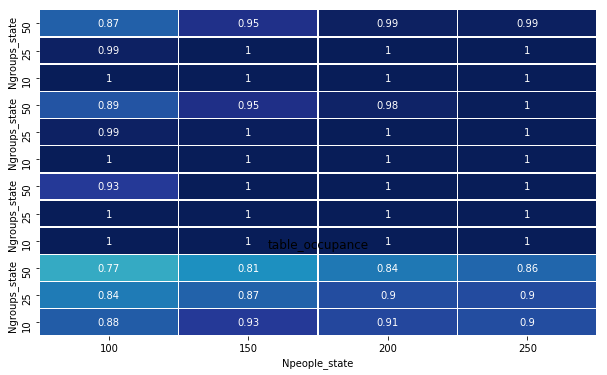

In [68]:
pylab.rcParams['figure.figsize'] = (10, 6)

q = 4
for i in range(0,q):
        if i==0:
            first = subplot(q,1,i+1)
            pivotted= PS1_summary[PS1_summary['Tolerance_state']== Tolerance_list[q-1-i]].pivot('Ngroups_state','Npeople_state','table_occupance')
            ax = sns.heatmap(pivotted,cmap='YlGnBu', annot=True, linewidths=.5, vmin=0.5, vmax =1, cbar=False)
            ax.invert_yaxis()
            #plt.setp(first.get_xticklabels(), visible=False)
            setp(first.get_yticklabels(), visible=True)
        else:
            then = subplot(q,1,i+1,sharex = first)
            pivotted= PS1_summary[PS1_summary['Tolerance_state']== Tolerance_list[q-1-i]].pivot('Ngroups_state','Npeople_state','table_occupance')
            ax=sns.heatmap(pivotted,cmap='YlGnBu', annot=True, linewidths=.5, vmin=0.5, vmax =1, cbar=False)
            ax.invert_yaxis()
            #plt.setp(then.get_xticklabels(), visible=False)
            setp(then.get_yticklabels(), visible=True)

subplots_adjust(wspace=0, hspace=0)
pylab.title('table_occupance')

#plt.show()

#### 1.2.3.6 Table occupance_PS2

Text(0.5,1,'table_occupance')

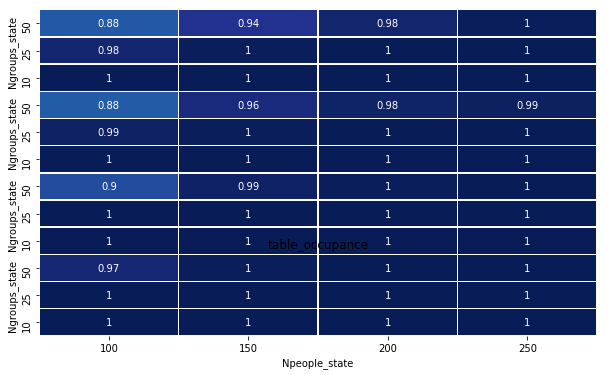

In [69]:
pylab.rcParams['figure.figsize'] = (10, 6)

q = 4
for i in range(0,q):
        if i==0:
            first = subplot(q,1,i+1)
            pivotted= PS2_summary[PS2_summary['Tolerance_state']== Tolerance_list[q-1-i]].pivot('Ngroups_state','Npeople_state','table_occupance')
            ax = sns.heatmap(pivotted,cmap='YlGnBu', annot=True, linewidths=.5, vmin=0.5, vmax =1, cbar=False)
            ax.invert_yaxis()
            #plt.setp(first.get_xticklabels(), visible=False)
            setp(first.get_yticklabels(), visible=True)
        else:
            then = subplot(q,1,i+1,sharex = first)
            pivotted= PS2_summary[PS2_summary['Tolerance_state']== Tolerance_list[q-1-i]].pivot('Ngroups_state','Npeople_state','table_occupance')
            ax=sns.heatmap(pivotted,cmap='YlGnBu', annot=True, linewidths=.5, vmin=0.5, vmax =1, cbar=False)
            ax.invert_yaxis()
            #plt.setp(then.get_xticklabels(), visible=False)
            setp(then.get_yticklabels(), visible=True)

subplots_adjust(wspace=0, hspace=0)
pylab.title('table_occupance')

#plt.show()

#### 1.2.3.7 Guest effort_PS1

Text(0.5,1,'guest_effort')

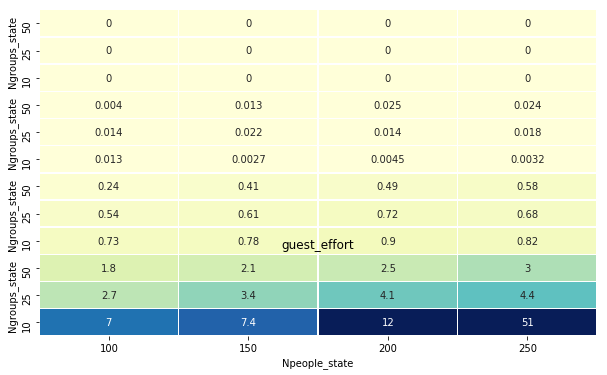

In [57]:
pylab.rcParams['figure.figsize'] = (10, 6)

q = 4
for i in range(0,q):
        if i==0:
            first = subplot(q,1,i+1)
            pivotted= PS1_summary[PS1_summary['Tolerance_state']== Tolerance_list[q-1-i]].pivot('Ngroups_state','Npeople_state','guest_effort')
            ax = sns.heatmap(pivotted,cmap='YlGnBu', annot=True, linewidths=.5, vmin=0, vmax =10, cbar=False)
            ax.invert_yaxis()
            #plt.setp(first.get_xticklabels(), visible=False)
            setp(first.get_yticklabels(), visible=True)
        else:
            then = subplot(q,1,i+1,sharex = first)
            pivotted= PS1_summary[PS1_summary['Tolerance_state']== Tolerance_list[q-1-i]].pivot('Ngroups_state','Npeople_state','guest_effort')
            ax=sns.heatmap(pivotted,cmap='YlGnBu', annot=True, linewidths=.5, vmin=0, vmax =10, cbar=False)
            ax.invert_yaxis()
            #plt.setp(then.get_xticklabels(), visible=False)
            setp(then.get_yticklabels(), visible=True)

subplots_adjust(wspace=0, hspace=0)
pylab.title('guest_effort')

#plt.show()

#### 1.2.3.8 Guest effort_PS2

Text(0.5,1,'guest_effort')

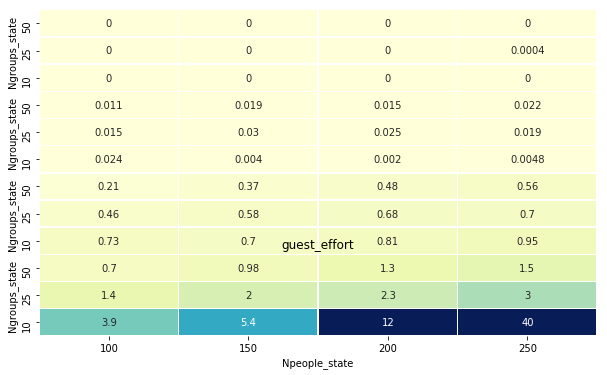

In [66]:
pylab.rcParams['figure.figsize'] = (10, 6)

q = 4
for i in range(0,q):
        if i==0:
            first = subplot(q,1,i+1)
            pivotted= PS2_summary[PS2_summary['Tolerance_state']== Tolerance_list[q-1-i]].pivot('Ngroups_state','Npeople_state','guest_effort')
            ax = sns.heatmap(pivotted,cmap='YlGnBu', annot=True, linewidths=.5, vmin=0, vmax =10, cbar=False)
            ax.invert_yaxis()
            #plt.setp(first.get_xticklabels(), visible=False)
            setp(first.get_yticklabels(), visible=True)
        else:
            then = subplot(q,1,i+1,sharex = first)
            pivotted= PS2_summary[PS2_summary['Tolerance_state']== Tolerance_list[q-1-i]].pivot('Ngroups_state','Npeople_state','guest_effort')
            ax=sns.heatmap(pivotted,cmap='YlGnBu', annot=True, linewidths=.5, vmin=0, vmax =10, cbar=False)
            ax.invert_yaxis()
            #plt.setp(then.get_xticklabels(), visible=False)
            setp(then.get_yticklabels(), visible=True)

subplots_adjust(wspace=0, hspace=0)
pylab.title('guest_effort')

#plt.show()

#### 1.2.3.9 Host effort_PS1

Text(0.5,1,'host_effort')

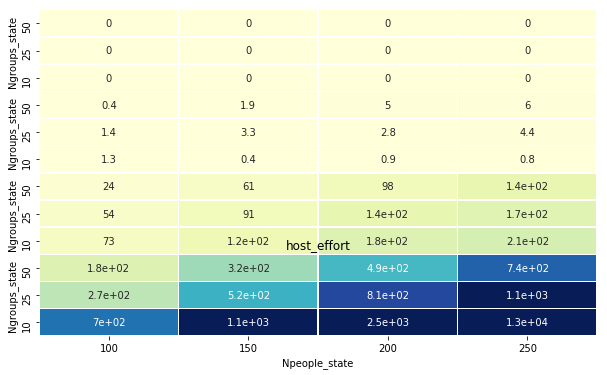

In [70]:
pylab.rcParams['figure.figsize'] = (10, 6)

q = 4
for i in range(0,q):
        if i==0:
            first = subplot(q,1,i+1)
            pivotted= PS1_summary[PS1_summary['Tolerance_state']== Tolerance_list[q-1-i]].pivot('Ngroups_state','Npeople_state','host_effort')
            ax = sns.heatmap(pivotted,cmap='YlGnBu', annot=True, linewidths=.5, vmin=0, vmax =1000, cbar=False)
            ax.invert_yaxis()
            #plt.setp(first.get_xticklabels(), visible=False)
            setp(first.get_yticklabels(), visible=True)
        else:
            then = subplot(q,1,i+1,sharex = first)
            pivotted= PS1_summary[PS1_summary['Tolerance_state']== Tolerance_list[q-1-i]].pivot('Ngroups_state','Npeople_state','host_effort')
            ax=sns.heatmap(pivotted,cmap='YlGnBu', annot=True, linewidths=.5, vmin=0, vmax =1000, cbar=False)
            ax.invert_yaxis()
            #plt.setp(then.get_xticklabels(), visible=False)
            setp(then.get_yticklabels(), visible=True)

subplots_adjust(wspace=0, hspace=0)
pylab.title('host_effort')

#plt.show()

#### 1.2.3.10 Host effort_PS2

Text(0.5,1,'host_effort')

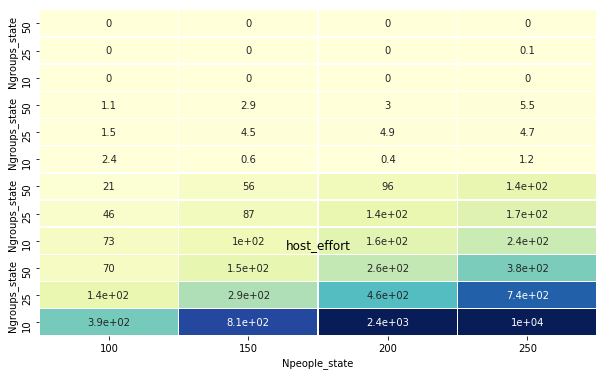

In [71]:
pylab.rcParams['figure.figsize'] = (10, 6)

q = 4
for i in range(0,q):
        if i==0:
            first = subplot(q,1,i+1)
            pivotted= PS2_summary[PS2_summary['Tolerance_state']== Tolerance_list[q-1-i]].pivot('Ngroups_state','Npeople_state','host_effort')
            ax = sns.heatmap(pivotted,cmap='YlGnBu', annot=True, linewidths=.5, vmin=0, vmax =1000, cbar=False)
            ax.invert_yaxis()
            #plt.setp(first.get_xticklabels(), visible=False)
            setp(first.get_yticklabels(), visible=True)
        else:
            then = subplot(q,1,i+1,sharex = first)
            pivotted= PS2_summary[PS2_summary['Tolerance_state']== Tolerance_list[q-1-i]].pivot('Ngroups_state','Npeople_state','host_effort')
            ax=sns.heatmap(pivotted,cmap='YlGnBu', annot=True, linewidths=.5, vmin=0, vmax =1000, cbar=False)
            ax.invert_yaxis()
            #plt.setp(then.get_xticklabels(), visible=False)
            setp(then.get_yticklabels(), visible=True)

subplots_adjust(wspace=0, hspace=0)
pylab.title('host_effort')

#plt.show()

### 1.3 Discuss why the simulaiton leads to group polarization (1 point)

From Ans 1.2 (1)

* Group polarization: higher with lower tolerance, 

* Group polarization is a trivial solution and an equilibrium point for tolerance = 0~1

* $\rightarrow$ especially for tolerance $< 0.5$



## 2 Understand Shunting Equation (5 points)

$\frac{dy}{dt}=-Ay+(B-y)*E-(y-C)*I$

### 2.1 Find its equilibrium by analytically solving $dy/dt=0$ (1 point)

Write your answer here with [LaTex](https://www.sharelatex.com/learn/Mathematical_expressions) formula

$\frac{dy}{dt} = -Ay+(B-y)*E-(y-C)*I = 0$

$\rightarrow$ $(-A-E-I)*y+ (B*E+C*I) = 0$

$\rightarrow$ $ y = \frac{B*E+C*I}{A+E+I}$

### 2.2 Use Euler integration to verify your answer in 2.1 with your own (A, B, C, E, I) constants (2 points)


0.6666666666666685
0.6666666666666666


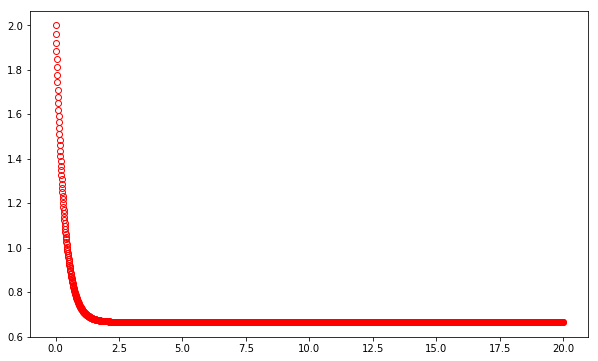

In [76]:
# Write your simulation codes here
dt=.01
A = 1 
B = 1
C = 1
E = 1
I = 1

y=[2] # initial condition
t=np.arange(0,20,dt)
for i in t:
    y1=y[-1] # the last element
    y2=y1+dt*( -A*y1 + (B-y1)*E - (y1-C)*I ) # Euler integration
    y.append(y2)
    
plot(t,y[0:-1],'ro',markerfacecolor='None'); # approximation

print(y[-1])
print((B*E+C*I)/(A+E+I))

* ground true: 2/3, estimated value: 0.666...

### 2.3 Combining math & if-then controls in numerical integrations (2 points)

Use Euler integration to plot $dy/dt=-y(t)+E$ where
$E=\begin{cases}
    1  &  \text{if } t<5\\
    0  &  \text{if } t>5
   \end{cases}$
for t=[0,10] & y(t=0)=0.

This is an example of time-varying rather than constant excitation.

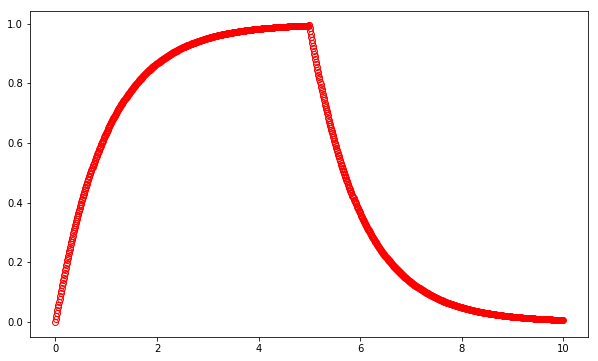

In [77]:
# Write your simulation codes here
dt=.01

y=[0] # initial condition
t=np.arange(0,10,dt)
for i in t:
    y1=y[-1] # the last element
    if i < 5:
        E = 1
    else:
        E = 0
    
    y2=y1+dt*(-y1+ E) # Euler integration
    y.append(y2)
    
plot(t,y[0:-1],'ro',markerfacecolor='None'); # approximation

$t < 5$, the aymptotic value $= 1$, $t > 5$, the aymptotic value $= 0$